<a href="https://colab.research.google.com/github/tvelichkovt/TensorFlow/blob/master/TF_006_SNN_DigitsDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tf -> "import"

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print('TensorFlow ver is:', tf.__version__, '\nKeras ver is:', keras.__version__, '\nPandas ver is:', pd.__version__, '\nNumpy ver is:', np.__version__)

TensorFlow ver is: 2.2.0 
Keras ver is: 2.3.0-tf 
Pandas ver is: 1.0.5 
Numpy ver is: 1.18.5


In [1]:
from matplotlib import cm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn import datasets
from sklearn.model_selection import train_test_split

# tf -> "SNN -> load the digit dataset"

In [3]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

# tf -> "SNN -> spliting data into train and test sets"

In [4]:
print(X_digits.shape)
print(y_digits.shape)
print(type(X_digits))
print(type(y_digits))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)

(1797, 64)
(1797,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# tf -> "SNN -> checking the shape of the input data"

In [5]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(1203, 64)
y_train:	(1203,)
x_test:		(594, 64)
y_test:		(594,)


# tf -> "SNN -> plot first 64 digits"

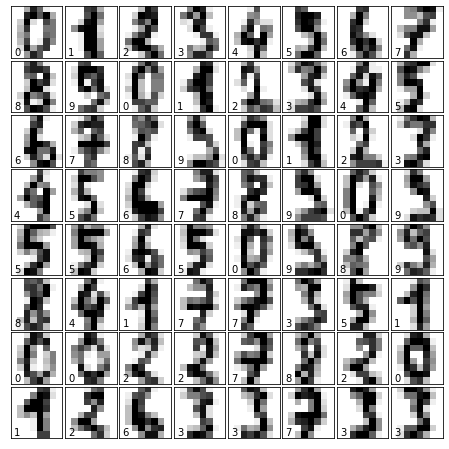

In [6]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# tf -> "SNN -> one Hot Encoding"

In [7]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# tf -> "Implement SNN -> hyperparameters"

In [8]:
# Hyperparameters
training_epochs = 30 # Total number of training epochs
learning_rate = 0.01 # The learning rate

# tf -> "Implement SNN -> creating a model"

In [9]:
# create a model
def create_model():
    model = Sequential()
    # Input layer
    model.add(Dense(64, input_dim=64, kernel_initializer='normal',
        kernel_regularizer= tf.keras.regularizers.l2(0.01),activation='tanh'))
    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile a model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 4,810
Trainable params: 4,810
Non-trainable params: 0
_________________________________________________________________


# tf -> "Implement SNN -> train the model"

In [10]:
results = model.fit(
    X_train, y_train,
    epochs= training_epochs,
    batch_size = 516,
    validation_data = (X_test, y_test),
    verbose = 0
)

# tf -> "Implement SNN -> test the model"

In [12]:
prediction_values = model.predict_classes(X_test)

# tf -> "Implement SNN -> evaluate the model to see the accuracy"

In [13]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0817, accuracy: 99.8338%
Evaluating on testing set...
loss=0.1496, accuracy: 97.1380%


# tf -> "Implement SNN -> summarize history for accuracy"

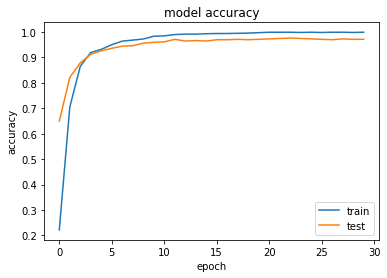

In [14]:
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

# tf -> "Implement SNN -> summarize history for loss"

Maximum Loss : 2.4616

Minimum Loss : 0.0821

Loss difference : 2.3795


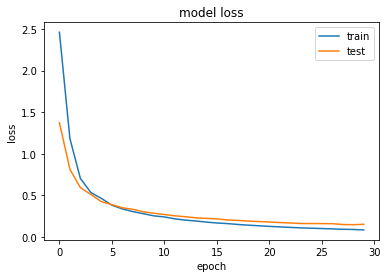

In [15]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# tf -> "Implement SNN -> display the test set and predictions"

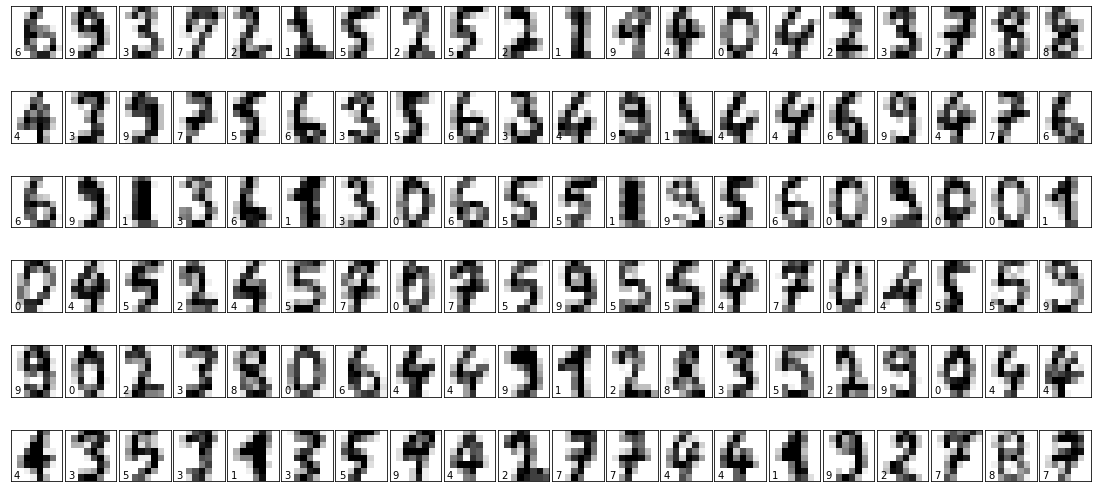

In [16]:
# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((8,8)),
              cmap=plt.cm.gray_r, 
              interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(prediction_values[i]))